# PyTorch

PyTorch is currently the most used Python package for Deep Learning.

This popularity is caused by it's
- **high performance** on GPUs
- flexibility and debugability (even on GPUs)
- **NumPy syntax**

Wow, how convenient: Just **replace each `np.` with `torch.`** and you are ***almost ready*** to run your code on the GPU with potential speedup 💨



## 1. Tensors

In PyTorch the basic data type is not called array but tensor resulting in the NumPy code
```python
import numpy as np

x = np.array([1, 2, 3])
```
corresponding to
```python
import torch

x = torch.tensor([1, 2, 3])
```

Besides that, there are many similarities:
```python
import torch

x0 = torch.zeros(5)           # x0: [0 0 0 0 0]
x1 = torch.arange(5)          # x1: [0 1 2 3 4]
x2 = torch.linspace(0, 1, 5)  # x2: [0. 0.25 0.5 0.75 1.]
...
```
Array conversion between PyTorch and NumPy can easily done via

```python
import torch
import numpy as np

x_numpy = np.array([1, 2, 3])
x_torch = torch.from_numpy(x_numpy)
x_back_to_numpy = x_torch.numpy()
```

Finally, in contrast to NumPy, tensors can be loaded to another `device` via
```python
import torch

x_cpu = torch.tensor([1, 2, 3])
x_cuda = x_cpu.cuda()
# or x_cuda = x_cpu.to(device='cuda')
x_back_to_cpu = x_cuda.cpu()
# x_back_to_cpu = x_cuda.to(device='cpu')
```

**Task 1.1:** Create two arrays containing random values: One with shape (1024, 2048) and another with shape (2048, 4096).

**Task 1.2:** Convert the arrays from Task 1.1 to tensors.

**Task 1.3:** Matrix multiply (use `@` instead of `*`) the two arrays and the two tensor, respectively.

**Task 1.4:** Use the time (or timeit) package to determine the time needed to do the array and the tensor multiplication, respectively.

________________
### Enable GPU on Colab 🔥

Thankfully, Colab allows you to use a GPU for free 🍀

To enable GPU you simply click on
- *Runtime*
- *Change runtime type*
- *T4 GPU*
________________

**Task 1.5:** Load the two tensors to the GPU and repeat Task 1.4.

## 2. Autograd 🦮

Besides GPU support another extra-feature of PyTorch is Autograd.

Autograd tracks the operations occuring to the tensors and allows to calculate the derivative of the (output) tensor with respect to another tensor the (output) tensor interacted with earlier.

<p>
<img src="https://sports-images.vice.com/images/2017/01/25/when-nick-young-the-basketball-player-met-nick-young-the-meme-body-image-1485378510.jpg"/>
<figcaption>Taken from <a href="https://sports-images.vice.com/images/2017/01/25/when-nick-young-the-basketball-player-met-nick-young-the-meme-body-image-1485378510.jpg">https://sports-images.vice.com/images/2017/01/25/when-nick-young-the-basketball-player-met-nick-young-the-meme-body-image-1485378510.jpg</a></figcaption>
</p>

"WHAT??? 🤨" you probably think. No need to panic, I will reiterate the concepts of the above sentence very slowly in this chapter.

 - If you are **scared of math**: **Skip this chapter** and think of **Autograd as a guide dog 🦮 for neural nets** during training
 - If you are **up for the challenge**: **Slowly, read this chapter** and refresh your high school knowledge of derivatives to **gain deeper insights**

Let's create a minimal example to grasp understanding
```python
import torch

x = torch.tensor(3., requires_grad=True)

f_x = x**2
f_x.backward()  # computes gradient aka (multidimensional) derivative
# Remember school: f(x) = x² -> df/dx = 2*x -> Gradient should be 2*x=6 here
print(x.grad)  # Output: 6. 🎉
```
As you might remember from school, the **derivative is equal to the slope** of a function.

Let's gain visual understanding by looking at f(x) = x² and adding a slope triangle at x=3.

You can see that f(x) moves up by 6 when x increases by 1:
- So, the slope is 6...
- ...or let's sound smarter: the derivative $\frac{df}{dx}$ is 6...
- ...or let's sound even smarter: the gradient $\nabla_x$ is 6!




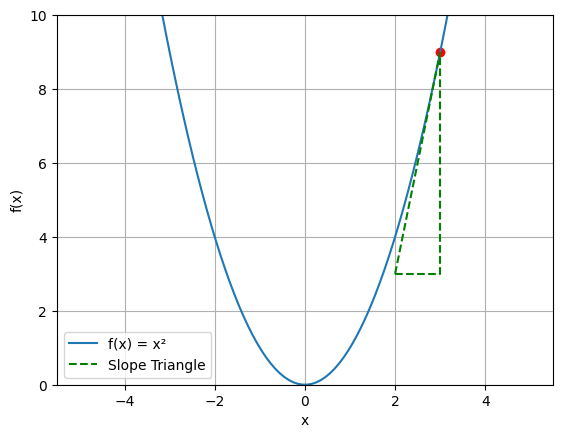

In [ ]:
#@title Create slope of f(x) = x² at x=3
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
tangent_line = 6 * (x - 3) + 3**2
triangle = ([2, 3, 3], [3, 3, 9])

plt.plot(x, x**2, label='f(x) = x²')
plt.scatter(3., 3**2, color='red')
plt.plot([2, 3], [3, 9], color='green', linestyle='--')
plt.plot(*triangle, color='green', linestyle='--', label='Slope Triangle')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(0, 10)
plt.grid()
plt.legend();



What was this annoying derivative - we will call gradient $\nabla$ starting now - "useful" for in math class again?

**Finding minima (and maxima) of a function, because the gradient $\nabla$ is 0 there**

**Training neural nets is basically equal to searching a minimum** but the function (called loss)
- is **multidimensional** -> not $f(x)$ but $f(x_0, x_1, ...., x_{1000000}, ...)$
- does have minima you **can't calculate with math and a piece of paper**

Instead we have to **try many different $x_0, x_1 ...x_{1000000}$ value combinations** and **hope for low f(x) values**...which would be a long-windedly adventure if the negative gradient $-\nabla$ would not guide us in the right direction 🦮


In the final plot you can marvel at the magic for our minimal example f(x) = x²: **Repeatedly moving x by $0.2 * -\nabla$ leads us to the minimum**

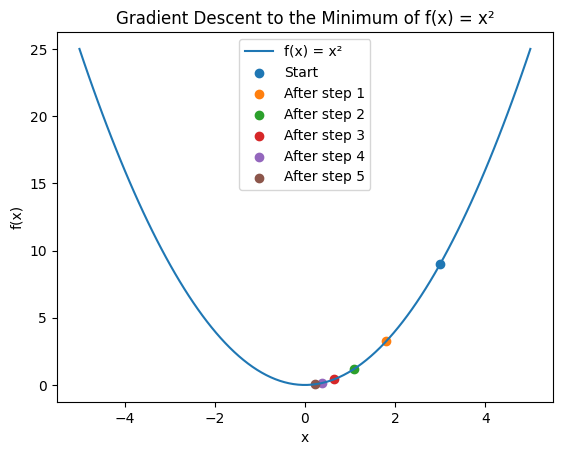

In [ ]:
#@title Create Gradient Descent to the Minimum of f(x) = x²
import torch
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
plt.plot(x, x**2, label='f(x) = x²')

x_moving = torch.tensor(3., requires_grad=True)  # Set start value
learning_rate = 0.2                              # How far to go in -∇ direction
n_steps = 5                                      # Number of steps

plt.scatter(x_moving.item(), (x_moving**2).item(), label='Start')

for i in range(n_steps):
    f_x = x_moving**2         # Compute function value and hope for a low one 🙏
    f_x.backward()            # Computes gradient
    x_moving.data -= learning_rate * x_moving.grad.data  # Move in -∇ direction
    x_moving.grad.zero_()     # Reset gradient to zero

    plt.scatter(x_moving.item(), (x_moving**2).item(), label=f'After step {i+1}')

plt.title('Gradient Descent to the Minimum of f(x) = x²')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend();

If you are still not scared/annoyed, you are only **one step away from** understanding the concept of **Gradient Descent** 🎉

To fully grasp what happens in the above plot click on "Show code" and play with it by
- changing the `learning rate` from $0.2$ to other values
- changing the `n_steps` to other values
- print stuff like `x_moving.grad.data` in the for-loop

and see what happens if you rerun it. You will find out why the random $0.2$ in $0.2 * -\nabla$ was needed 😉

If you are still scared/annoyed just go on and read this chapter again at the end of the course 🤓

<p>
<img src="https://i.kym-cdn.com/entries/icons/mobile/000/030/710/dd0.jpg"/>
<figcaption>Taken from <a href="https://i.kym-cdn.com/entries/icons/mobile/000/030/710/dd0.jpg">https://i.kym-cdn.com/entries/icons/mobile/000/030/710/dd0.jpg</a></figcaption>
</p>

## 3. Dataset

PyTorch provides the `torch.utils.data.Dataset` class which allows you to build your own Dataset
```python
import torch

class MinimalDataset(torch.utils.data.Dataset):
    def __init__(self, size=10):
        self.x = torch.zeros(size, 3)  # Dummy data
        self.y = torch.zeros(size, 1)  # Dummy data

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
```
The MinimalDataset implements the three methods

- `__init__`: Creates the Dataset instance and defines which data it contains
- `__len__`: Returns the number of items in the Dataset
- `__getitem__`: Returns a certain item specified via the index `idx`

which are always required to create a custom dataset.

**Task 3.1**: Create a `NumpyDataset` which takes an `image_array` and an `age_array` (use numpy arrays with random values and a reasonable shape) and converts them to tensors which can be accessed via `__getitem__` and also add the `__len__` method.

**Task 3.2**: Create an instance of the `NumpyDataset` and use a `for`-loop to store its first 5 items in a list.

**Task 3.3**: Use `tqdm` to find out how fast the `for`-loop from Task 3.2 is.

## 4. DataLoader

With `torch.utils.data.DataLoader` PyTorch provides a class which returns the data provided by a `torch.utils.data.Dataset` in a

- batched: Multiple items at once
- shuffled: Randomized batching of items and order of loading those batches

format

```python
import torch

minimal_dataset = MinimalDataset(size=200)
dataloader = torch.utils.data.DataLoader(minimal_dataset, batch_size=2, shuffle=True)

for batch in dataloader:
    print(batch)
```

**Task 4.1**: Create a `np_dataloader` out of the instance of the `NumpyDataset` from Task 3.2.

**Task 4.2**: Load batches without shuffling and a batch size of 4 from the dataloader from Task 4.1 and print their shape.

# Exercise

## 🚨 Warning 🚨

This exercise builds on 1_Introduction and the exercise of 2_Data_Exploration and 4_Preprocessing.

You have to run these Notebooks (if you didn't already) and mount your Google Drive to this Notebook via
```python
from google.colab import drive
drive.mount('/content/drive')
```
then you are ready to go!

1. Load the DataFrame you saved at the end of the exercise in 4_Preprocessing.

2. Split it into two DataFrames `train_df` and `valid_df` with 80% of the original rows in `train_df` and the remaining 20% in `valid_df`.

3. Create a `NiftiDataset` which takes `filepaths` and `ages` (e.g. as `pd.Series`). Task 3.1 is a good reference point 😉

In [ ]:
#@title Open, if you need help to find the solution
import torch

class NiftiDataset(torch.utils.data.Dataset):
    def __init__(self, filepaths, age_array):
        self.mri_images = []
        for fpath in filepaths:
            image = self.load_nifti_as_tensor(fpath)
            self.mri_images.append(image)
        self.ages = torch.from_numpy(age_array)

    def __len__(self):
        return len(self.mri_images)

    @staticmethod
    def load_nifti_as_tensor(filepath):
      ...
      return tensor

nifti_dataset = NiftiDataset(df.zscore_filepath, df.age.values)
image_tensor, age_tensor = nifti_dataset[0]

4. Using `train_df` and `valid_df` create two instances of the `NiftiDataset` named `train_ds` and `valid_ds`.

5. Using `train_ds` and `valid_ds` to instantiate two `DataLoaders` named `train_dl` and `valid_dl` with one sample per batch and no shuffeling in `valid_dl`

6. Print the shape and dtype of all batches in `valid_dl`